# Overview
* [Exploratory data analysis (EDA)](#Exploratory-data-analysis-(EDA))
* [Data Preparation](#Data-Preparation)
* [Model](#Model)
* [Model Evaluation](#Model-Evaluation)
    * [SVC (linear)](#SVC-(linear))
    * [Decision Tree](#Decision-Tree)
    * [Random Forest](#Random-Forest)
    * [Xgboost](#Xgboost)



In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files


import warnings
warnings.filterwarnings("ignore")

In [220]:
# Upload dataset.csv from your local machine
uploaded = files.upload()

# Assuming dataset.csv is the name of the uploaded file
filename = "Diabetic_Nephropathy_v1.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(filename)

# Display the DataFrame
data.head()

Saving Diabetic_Nephropathy_v1.csv to Diabetic_Nephropathy_v1 (3).csv


,Sex,Age,Diabetes duration (y),Diabetic retinopathy (DR),Diabetic nephropathy (DN),Smoking,Drinking,Height(cm),Weight(kg),BMI (kg/m2),SBP (mmHg),DBP (mmHg),HbA1c (%),FBG (mmol/L),TG?mmoll?,C-peptide (ng/ml?,TC?mmoll?,HDLC?mmoll?,LDLC?mmoll?,Insulin,Metformin,Lipid lowering drugs,serum_creatinine,eGFR,CKD
0,Male,57,10.0,1,1,1,0,178.0,60.0,18.937003,101,69,14.1,17.420,1.95,0.98,5.51,1.08,3.71,1,1,1,1.9,30.123762,CKD
1,Male,50,8.0,1,1,1,1,172.0,72.5,24.506490,156,96,10.0,1.024,1.76,0.94,4.40,0.90,2.85,1,0,0,1.1,56.873996,CKD
2,Male,53,8.0,1,0,1,0,168.0,62.0,21.967120,105,71,9.6,8.020,0.84,0.55,4.33,1.04,2.98,1,0,0,1.3,46.588693,CKD
3,Male,52,20.0,1,1,0,0,175.0,66.0,21.551020,104,74,8.1,5.980,1.00,1.36,4.74,1.45,2.90,1,0,0,1.9,30.928035,CKD
4,Female,56,12.0,1,1,0,0,159.0,68.8,27.214113,155,108,10.0,10.770,2.20,3.63,3.37,0.66,1.90,1,0,1,2.7,20.613883,CKD


In [221]:
pd.set_option('display.max_columns', None)

In [222]:
data.shape

(767, 25)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        767 non-null    object 
 1   Age                        767 non-null    int64  
 2   Diabetes duration (y)      766 non-null    float64
 3   Diabetic retinopathy (DR)  767 non-null    int64  
 4   Diabetic nephropathy (DN)  767 non-null    int64  
 5   Smoking                    767 non-null    int64  
 6   Drinking                   767 non-null    int64  
 7   Height(cm)                 766 non-null    float64
 8   Weight(kg)                 767 non-null    float64
 9   BMI (kg/m2)                766 non-null    float64
 10  SBP (mmHg)                 767 non-null    int64  
 11  DBP (mmHg)                 767 non-null    int64  
 12  HbA1c (%)                  764 non-null    float64
 13  FBG (mmol/L)               766 non-null    float64

In [224]:
data.nunique()

Sex                            2
Age                           59
Diabetes duration (y)         34
Diabetic retinopathy (DR)      2
Diabetic nephropathy (DN)      2
Smoking                        2
Drinking                       2
Height(cm)                    43
Weight(kg)                   104
BMI (kg/m2)                  515
SBP (mmHg)                    95
DBP (mmHg)                    67
HbA1c (%)                     93
FBG (mmol/L)                 513
TG?mmoll?                    297
C-peptide (ng/ml?            241
TC?mmoll?                    324
HDLC?mmoll?                  137
LDLC?mmoll?                  313
Insulin                        2
Metformin                      2
Lipid lowering drugs           2
serum_creatinine              40
eGFR                         225
CKD                            2
dtype: int64

In [225]:
data.isna().sum()

Sex                            0
Age                            0
Diabetes duration (y)          1
Diabetic retinopathy (DR)      0
Diabetic nephropathy (DN)      0
Smoking                        0
Drinking                       0
Height(cm)                     1
Weight(kg)                     0
BMI (kg/m2)                    1
SBP (mmHg)                     0
DBP (mmHg)                     0
HbA1c (%)                      3
FBG (mmol/L)                   1
TG?mmoll?                      5
C-peptide (ng/ml?              1
TC?mmoll?                      5
HDLC?mmoll?                    7
LDLC?mmoll?                    7
Insulin                        0
Metformin                      0
Lipid lowering drugs           0
serum_creatinine             468
eGFR                         468
CKD                          468
dtype: int64

In [226]:
data.columns

Index(['Sex', 'Age', 'Diabetes duration (y)', 'Diabetic retinopathy (DR)',
       'Diabetic nephropathy (DN)', 'Smoking', 'Drinking', 'Height(cm)',
       'Weight(kg)', 'BMI (kg/m2)', 'SBP (mmHg) ', 'DBP (mmHg)', 'HbA1c (%)',
       'FBG (mmol/L)', 'TG?mmoll?', 'C-peptide (ng/ml?', 'TC?mmoll?',
       'HDLC?mmoll?', 'LDLC?mmoll?', 'Insulin', 'Metformin',
       'Lipid lowering drugs', 'serum_creatinine', 'eGFR', 'CKD'],
      dtype='object')

In [227]:
# rename column names to make it more user-friendly

data.columns = ['Sex', 'Age', 'Diabetesduration', 'Diabeticretinopathy', 'Diabeticnephropathy', 'Smoking',
              'Drinking', 'Height', 'Weight', 'BMI', 'SBP', 'DBP',
              'HbA1c', 'FBG', 'TG', 'C-peptide', 'TC',
              'HDLC', 'LDLC', 'Insulin', 'Metformin', 'Lipidloweringdrugs',
              'serum_creatinine', 'eGFR','CKD']

In [228]:
data.head()

,Sex,Age,Diabetesduration,Diabeticretinopathy,Diabeticnephropathy,Smoking,Drinking,Height,Weight,BMI,SBP,DBP,HbA1c,FBG,TG,C-peptide,TC,HDLC,LDLC,Insulin,Metformin,Lipidloweringdrugs,serum_creatinine,eGFR,CKD
0,Male,57,10.0,1,1,1,0,178.0,60.0,18.937003,101,69,14.1,17.420,1.95,0.98,5.51,1.08,3.71,1,1,1,1.9,30.123762,CKD
1,Male,50,8.0,1,1,1,1,172.0,72.5,24.506490,156,96,10.0,1.024,1.76,0.94,4.40,0.90,2.85,1,0,0,1.1,56.873996,CKD
2,Male,53,8.0,1,0,1,0,168.0,62.0,21.967120,105,71,9.6,8.020,0.84,0.55,4.33,1.04,2.98,1,0,0,1.3,46.588693,CKD
3,Male,52,20.0,1,1,0,0,175.0,66.0,21.551020,104,74,8.1,5.980,1.00,1.36,4.74,1.45,2.90,1,0,0,1.9,30.928035,CKD
4,Female,56,12.0,1,1,0,0,159.0,68.8,27.214113,155,108,10.0,10.770,2.20,3.63,3.37,0.66,1.90,1,0,1,2.7,20.613883,CKD


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  767 non-null    object 
 1   Age                  767 non-null    int64  
 2   Diabetesduration     766 non-null    float64
 3   Diabeticretinopathy  767 non-null    int64  
 4   Diabeticnephropathy  767 non-null    int64  
 5   Smoking              767 non-null    int64  
 6   Drinking             767 non-null    int64  
 7   Height               766 non-null    float64
 8   Weight               767 non-null    float64
 9   BMI                  766 non-null    float64
 10  SBP                  767 non-null    int64  
 11  DBP                  767 non-null    int64  
 12  HbA1c                764 non-null    float64
 13  FBG                  766 non-null    float64
 14  TG                   762 non-null    float64
 15  C-peptide            766 non-null    flo

In [230]:
data.describe()

,Age,Diabetesduration,Diabeticretinopathy,Diabeticnephropathy,Smoking,Drinking,Height,Weight,BMI,SBP,DBP,HbA1c,FBG,TG,C-peptide,TC,HDLC,LDLC,Insulin,Metformin,Lipidloweringdrugs,serum_creatinine,eGFR
count,767.000000,766.000000,767.000000,767.000000,767.000000,767.000000,766.000000,767.000000,766.000000,767.000000,767.000000,764.000000,766.000000,762.000000,766.000000,762.000000,760.000000,760.000000,767.000000,767.000000,767.000000,299.00000,299.000000
mean,56.080834,9.360248,0.380704,0.259452,0.316819,0.292047,166.714099,69.863038,25.075920,134.857888,88.685789,8.753141,8.472146,1.930354,1.145548,4.426640,1.081237,2.885855,0.778357,0.644068,0.644068,1.39388,54.775650
std,10.945807,7.009745,0.485877,0.438620,0.465540,0.455000,8.485157,11.860997,3.560493,19.151570,185.561280,1.941537,3.011414,1.394743,0.783751,1.033601,0.307442,7.033057,0.415623,0.479107,0.479107,1.03451,21.408526
min,24.000000,0.100000,0.000000,0.000000,0.000000,0.000000,108.000000,42.600000,16.384697,92.000000,50.000000,4.700000,1.024000,0.410000,0.010000,0.710000,0.380000,0.370000,0.000000,0.000000,0.000000,0.50000,4.939201
25%,49.000000,3.000000,0.000000,0.000000,0.000000,0.000000,160.000000,61.000000,22.858449,122.000000,74.000000,7.300000,6.270000,1.100000,0.640000,3.710000,0.877500,2.010000,1.000000,0.000000,0.000000,0.90000,39.756272
50%,56.000000,9.000000,0.000000,0.000000,0.000000,0.000000,168.000000,69.000000,24.801587,133.000000,81.000000,8.500000,7.835000,1.585000,1.000000,4.350000,1.020000,2.560000,1.000000,1.000000,1.000000,1.10000,54.774957
75%,64.000000,14.000000,1.000000,1.000000,1.000000,1.000000,173.000000,77.000000,26.980496,146.000000,89.000000,9.800000,10.147500,2.280000,1.397500,5.000000,1.230000,3.202500,1.000000,1.000000,1.000000,1.40000,66.479425
max,88.000000,32.000000,1.000000,1.000000,1.000000,1.000000,190.000000,122.400000,63.443073,218.000000,5210.000000,17.100000,22.090000,13.000000,8.940000,8.740000,2.640000,195.000000,1.000000,1.000000,1.000000,9.40000,129.061300


In [231]:
# Extracting categorical and numerical columns

# cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [232]:
data['CKD'] = data['CKD'].map({'CKD': 1, 'NO CKD': 0})
data['CKD'] = pd.to_numeric(data['CKD'], errors='coerce')

* [Go-to-top](#Overview)

## Exploratory data analysis (EDA)

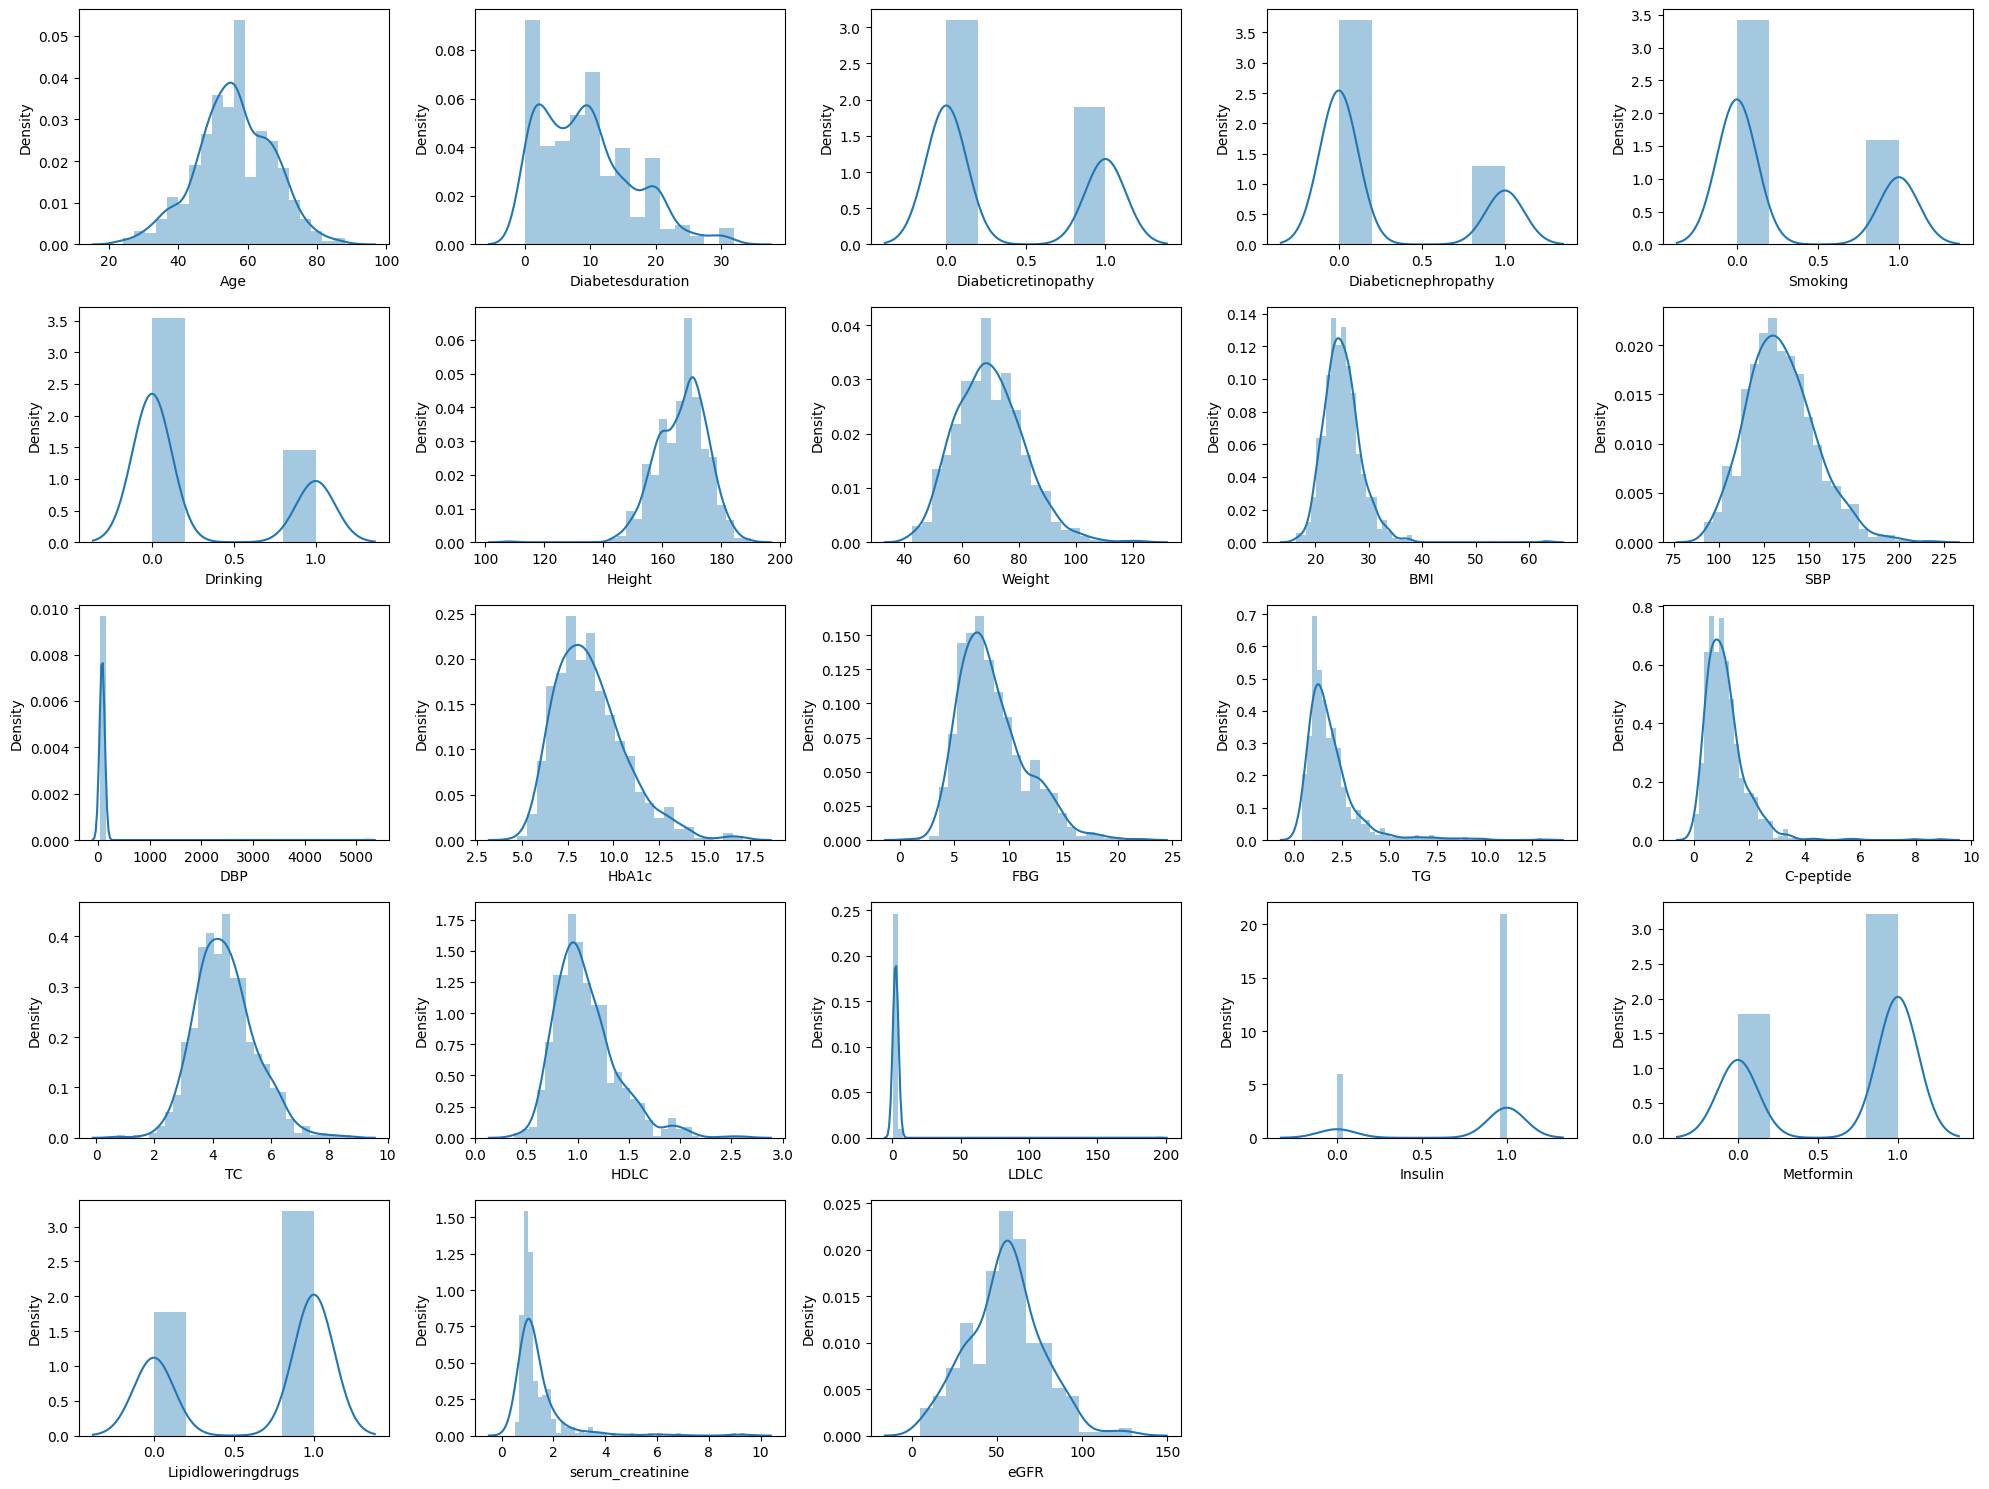

In [233]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 23:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

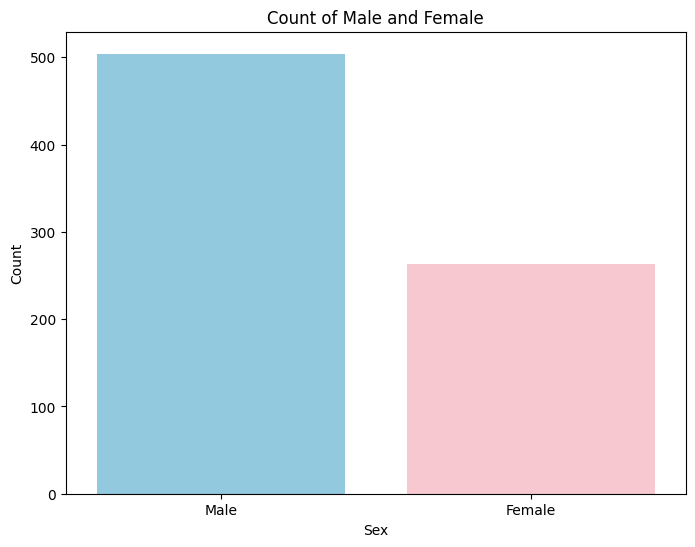

In [234]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', palette=['skyblue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Male and Female')
plt.show()

In [235]:
dcor = data.copy()

dcor = dcor.drop(columns=['Sex'])
dcor.head()

,Age,Diabetesduration,Diabeticretinopathy,Diabeticnephropathy,Smoking,Drinking,Height,Weight,BMI,SBP,DBP,HbA1c,FBG,TG,C-peptide,TC,HDLC,LDLC,Insulin,Metformin,Lipidloweringdrugs,serum_creatinine,eGFR,CKD
0,57,10.0,1,1,1,0,178.0,60.0,18.937003,101,69,14.1,17.420,1.95,0.98,5.51,1.08,3.71,1,1,1,1.9,30.123762,1.0
1,50,8.0,1,1,1,1,172.0,72.5,24.506490,156,96,10.0,1.024,1.76,0.94,4.40,0.90,2.85,1,0,0,1.1,56.873996,1.0
2,53,8.0,1,0,1,0,168.0,62.0,21.967120,105,71,9.6,8.020,0.84,0.55,4.33,1.04,2.98,1,0,0,1.3,46.588693,1.0
3,52,20.0,1,1,0,0,175.0,66.0,21.551020,104,74,8.1,5.980,1.00,1.36,4.74,1.45,2.90,1,0,0,1.9,30.928035,1.0
4,56,12.0,1,1,0,0,159.0,68.8,27.214113,155,108,10.0,10.770,2.20,3.63,3.37,0.66,1.90,1,0,1,2.7,20.613883,1.0


In [236]:
dcor.corr()

,Age,Diabetesduration,Diabeticretinopathy,Diabeticnephropathy,Smoking,Drinking,Height,Weight,BMI,SBP,DBP,HbA1c,FBG,TG,C-peptide,TC,HDLC,LDLC,Insulin,Metformin,Lipidloweringdrugs,serum_creatinine,eGFR,CKD
Age,1.000000,0.401060,-0.031814,0.041852,-0.094444,-0.082860,-0.340180,-0.317767,-0.118891,0.132136,-0.039110,-0.038003,-0.104730,-0.196963,-0.077954,-0.055430,0.235138,0.005912,0.010830,-0.060475,0.157346,0.016303,-0.157868,0.138666
Diabetesduration,0.401060,1.000000,0.218371,0.174754,-0.055035,-0.049529,-0.126454,-0.134370,-0.076093,0.109141,-0.049799,-0.145708,-0.081428,-0.140939,-0.180174,-0.038325,0.214922,0.103539,0.181242,-0.125315,0.073172,-0.022745,-0.045868,0.086989
Diabeticretinopathy,-0.031814,0.218371,1.000000,0.240372,0.037451,-0.007545,0.002372,0.005175,-0.005964,0.114269,0.046737,0.023339,0.028457,-0.055078,0.041971,-0.020583,0.016674,0.045037,0.153340,-0.207878,0.044484,0.099143,-0.135578,0.013754
Diabeticnephropathy,0.041852,0.174754,0.240372,1.000000,0.031666,-0.046557,0.020677,0.066336,0.057188,0.185914,-0.018598,0.119436,0.085202,0.086829,0.077105,0.072102,-0.078574,0.070140,0.086699,-0.150147,0.092131,-0.000152,-0.091751,0.101743
Smoking,-0.094444,-0.055035,0.037451,0.031666,1.000000,0.598026,0.368010,0.194432,-0.032778,0.033170,-0.015772,0.017942,-0.050963,-0.000456,-0.026147,-0.020087,-0.126285,-0.021384,0.012544,0.032142,0.090673,0.094713,-0.070754,0.048558
Drinking,-0.082860,-0.049529,-0.007545,-0.046557,0.598026,1.000000,0.329669,0.239526,0.044985,0.070688,-0.011900,-0.039276,-0.036444,0.084339,-0.023692,-0.051489,-0.087065,-0.033042,0.011377,0.052274,0.052274,0.056907,-0.067013,0.070890
Height,-0.340180,-0.126454,0.002372,0.020677,0.368010,0.329669,1.000000,0.618647,-0.030654,-0.002473,0.010229,-0.009980,-0.022162,0.107956,0.024794,-0.060077,-0.304510,0.024872,-0.076544,0.113135,0.035786,0.056581,-0.028737,-0.061608
Weight,-0.317767,-0.134370,0.005175,0.066336,0.194432,0.239526,0.618647,1.000000,0.748929,0.132026,-0.028111,-0.039086,-0.007590,0.225628,0.171527,-0.023494,-0.364436,0.012271,-0.056654,0.144284,0.049049,0.032113,-0.016501,-0.036503
BMI,-0.118891,-0.076093,-0.005964,0.057188,-0.032778,0.044985,-0.030654,0.748929,1.000000,0.145549,-0.042513,-0.038343,-0.000499,0.181619,0.184322,0.009884,-0.217463,-0.002900,-0.010658,0.098390,0.034414,0.008599,-0.001940,-0.003026
SBP,0.132136,0.109141,0.114269,0.185914,0.033170,0.070688,-0.002473,0.132026,0.145549,1.000000,0.034439,-0.020203,0.018929,0.042773,0.088116,0.126728,0.024471,0.015410,0.056557,-0.019748,0.103180,0.005325,-0.068236,0.041232


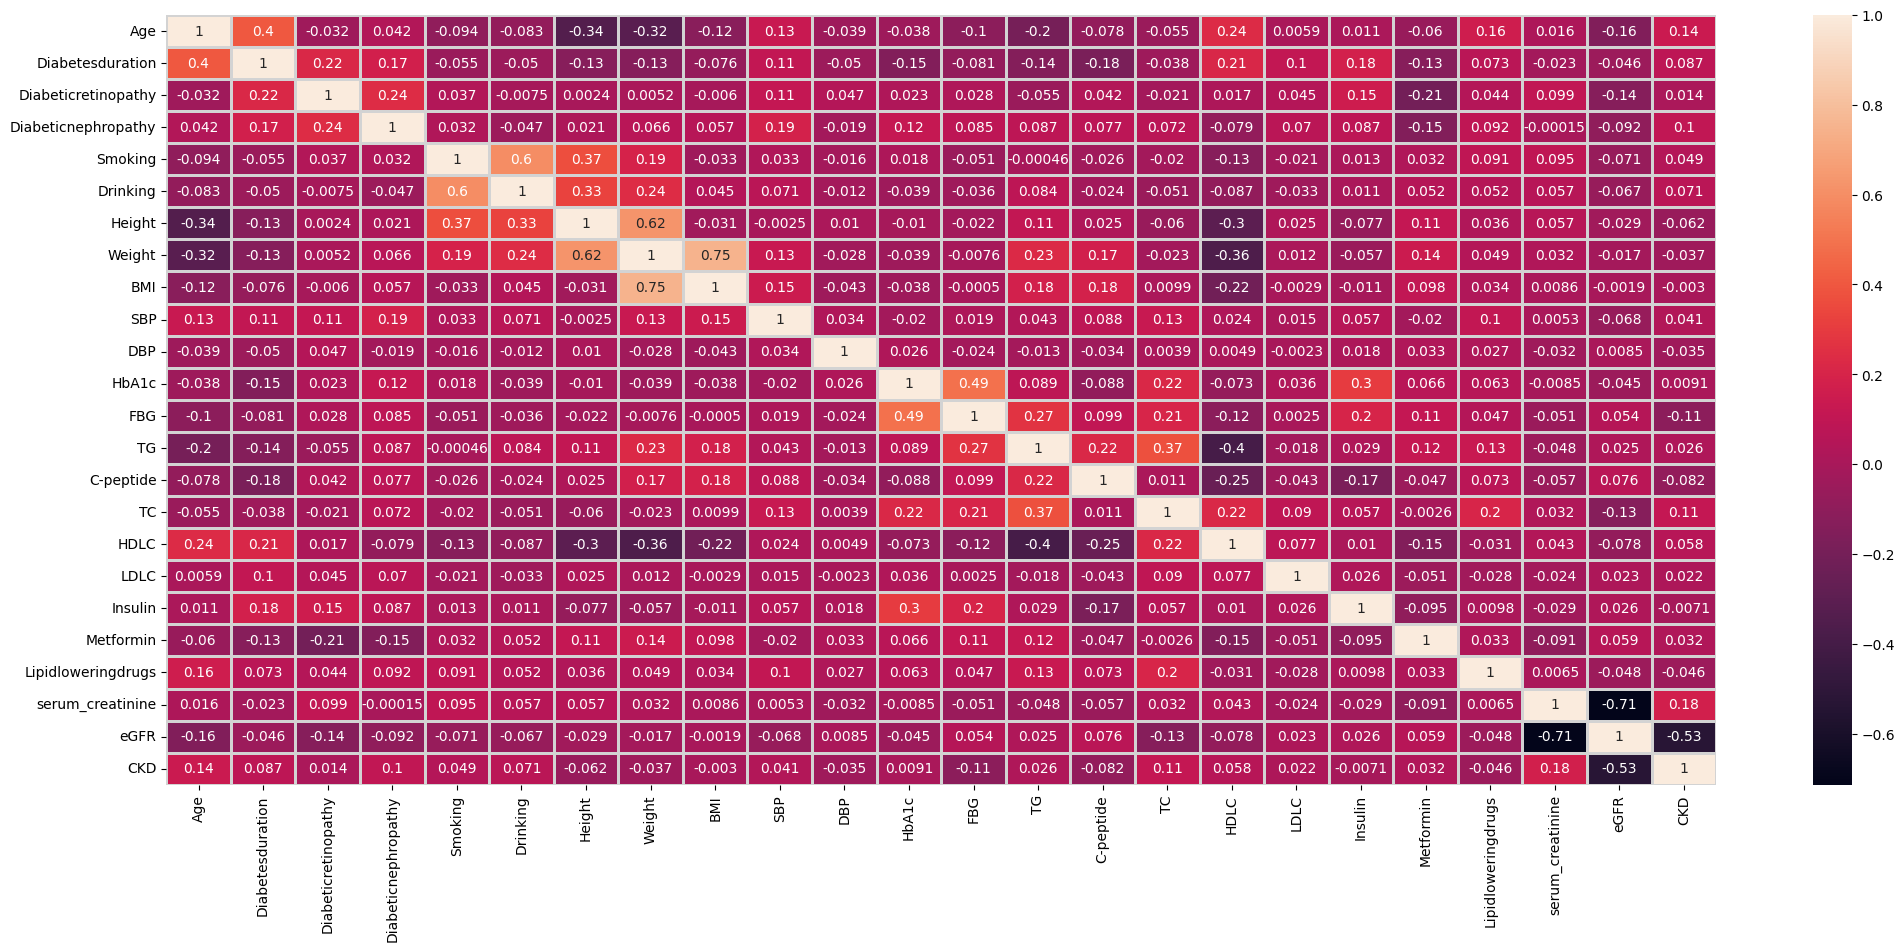

In [237]:
# heatmap of data

plt.figure(figsize = (25, 10))

sns.heatmap(dcor.corr(), annot = True,annot_kws={"size": 10}, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [238]:
# defining functions to create plot

def violin(col):
    fig = px.violin(data, y=col, x='CKD', color='CKD', box=True, template = 'plotly_dark')
    fig.update_layout(height=500, width=800)
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(data, hue='CKD', height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    plt.subplots_adjust(top=0.9)
    grid.add_legend()


In [239]:
data.columns

Index(['Sex', 'Age', 'Diabetesduration', 'Diabeticretinopathy',
       'Diabeticnephropathy', 'Smoking', 'Drinking', 'Height', 'Weight', 'BMI',
       'SBP', 'DBP', 'HbA1c', 'FBG', 'TG', 'C-peptide', 'TC', 'HDLC', 'LDLC',
       'Insulin', 'Metformin', 'Lipidloweringdrugs', 'serum_creatinine',
       'eGFR', 'CKD'],
      dtype='object')

In [240]:
violin('Age')

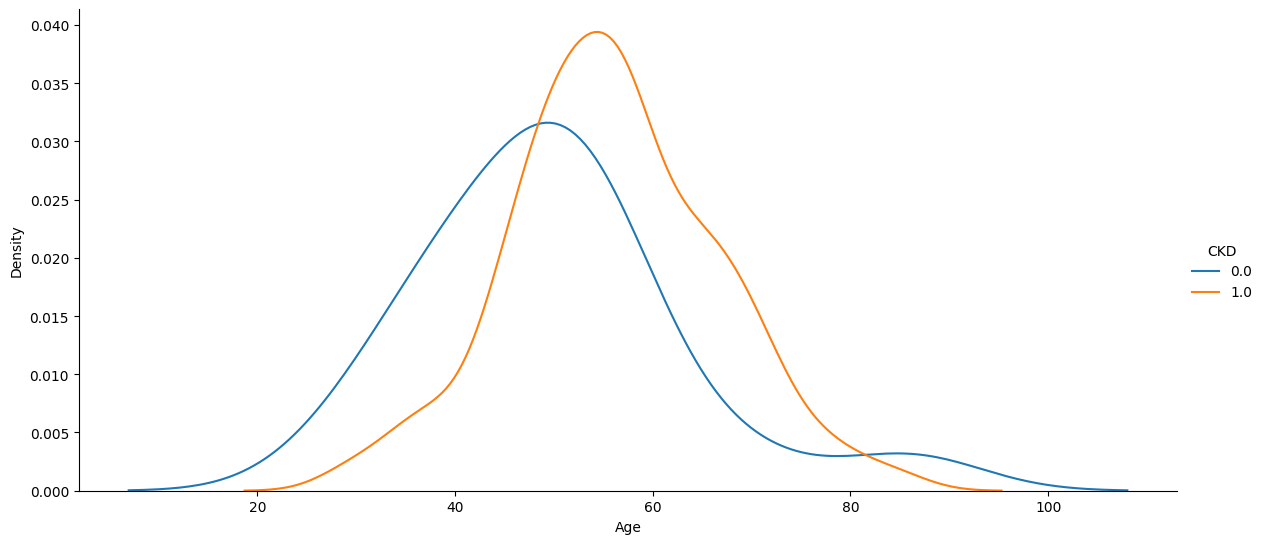

In [241]:
kde('Age')

In [242]:
violin('Diabetesduration')

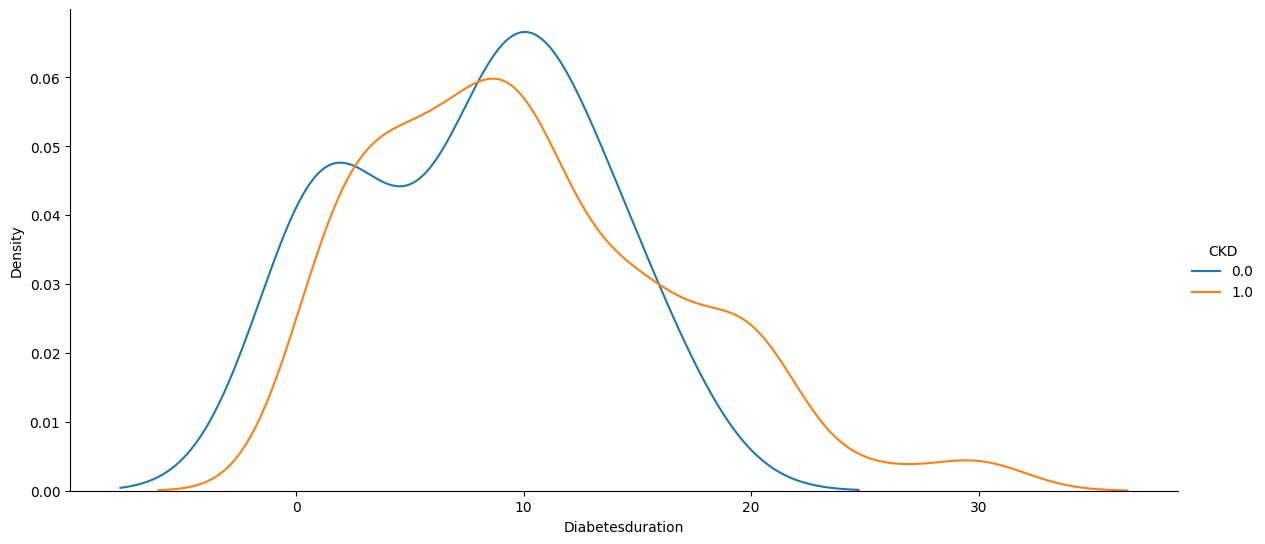

In [243]:
kde('Diabetesduration')

In [244]:
violin('eGFR')

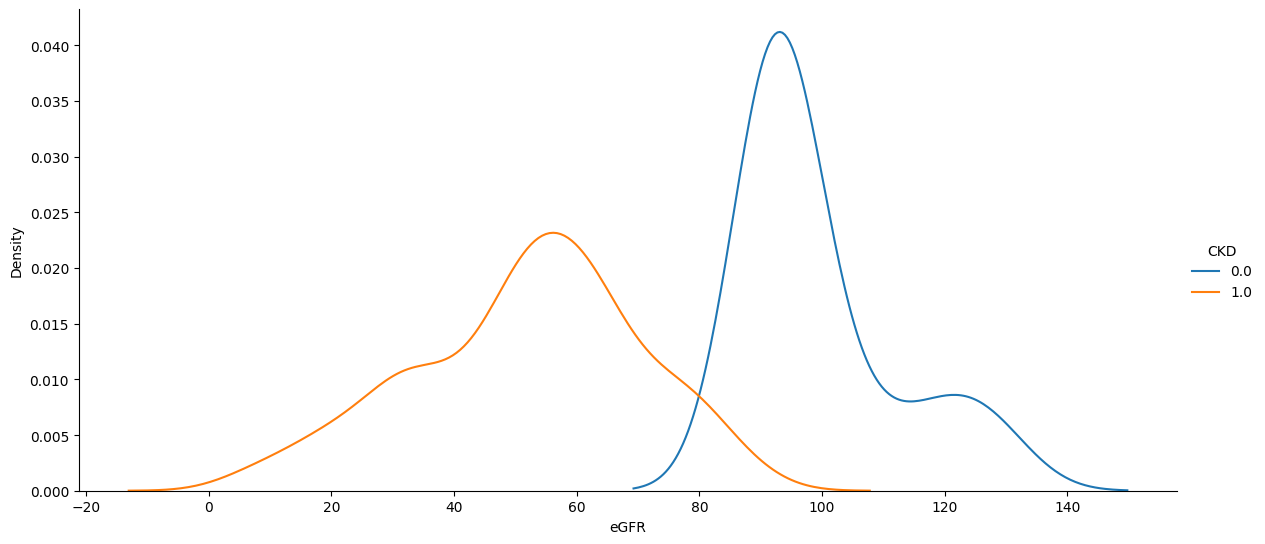

In [245]:
kde('eGFR')

In [246]:
violin('SBP')

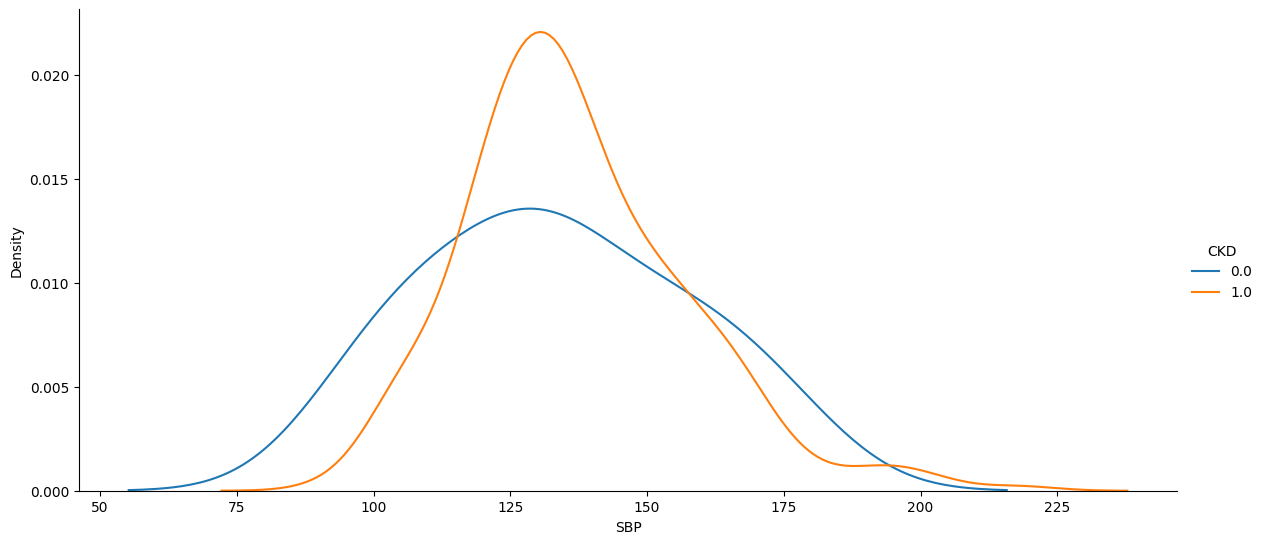

In [247]:
kde('SBP')

In [248]:
violin('DBP')

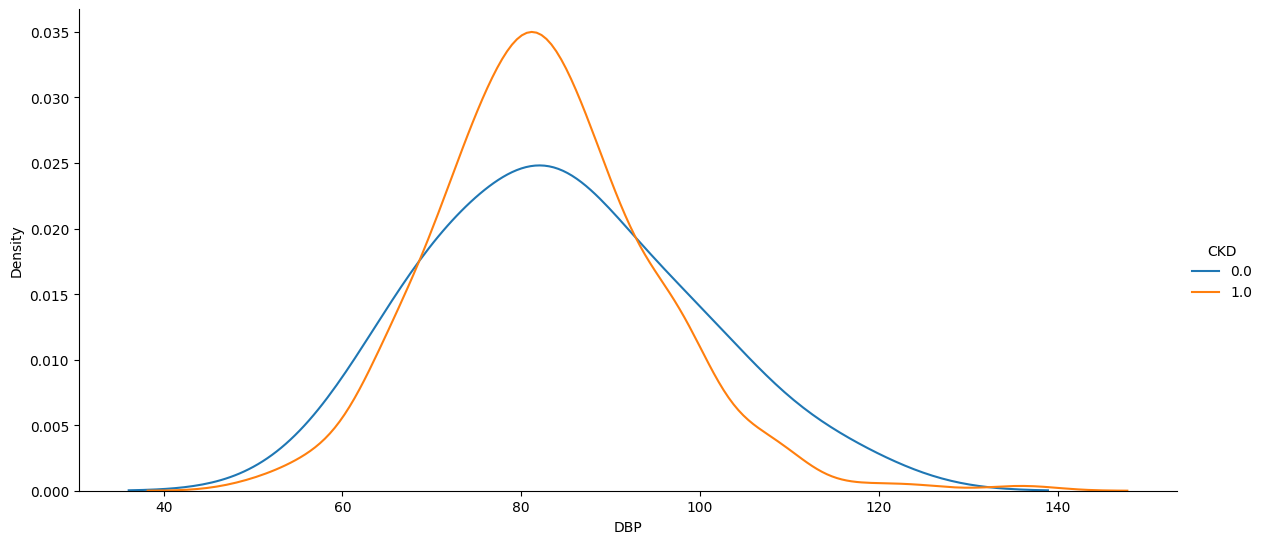

In [249]:
kde('DBP')

In [250]:
violin('BMI')

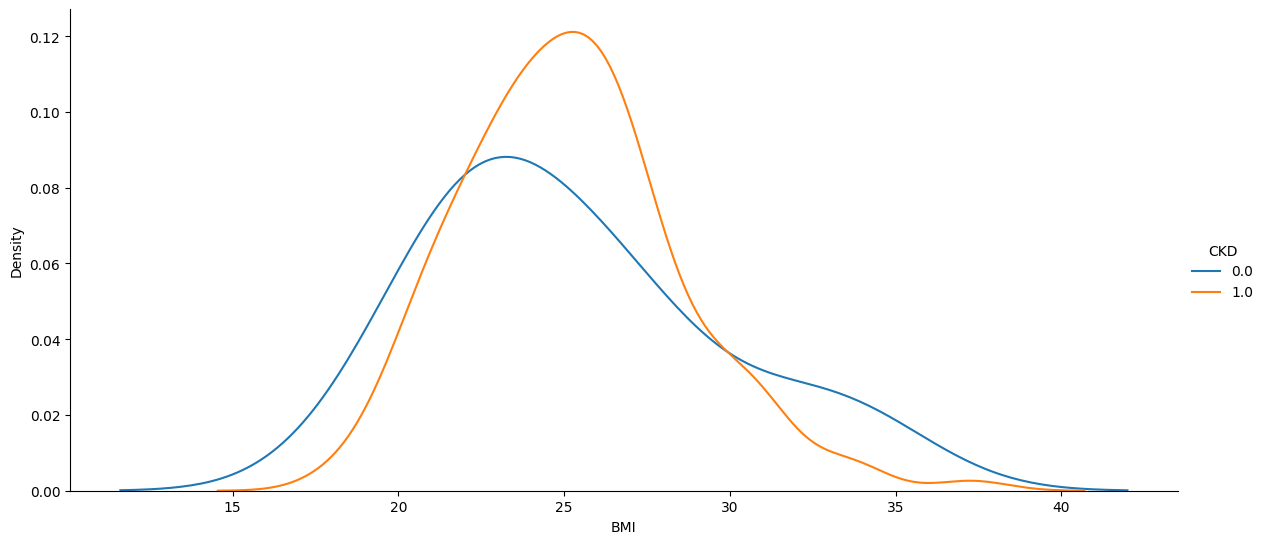

In [251]:
kde('BMI')

In [252]:
violin('HbA1c')

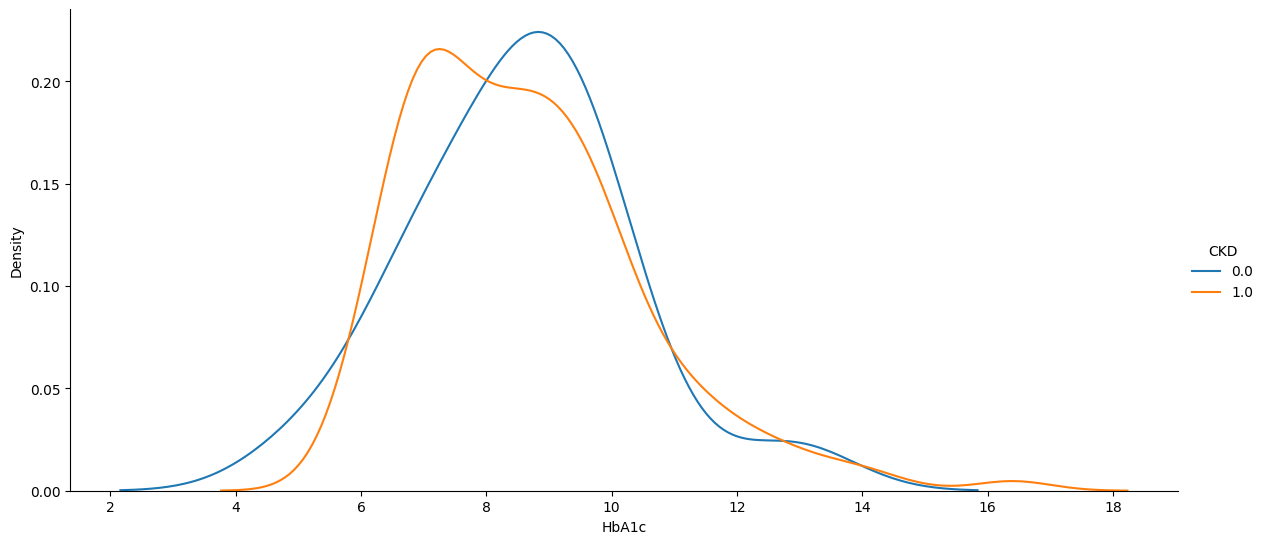

In [253]:
kde('HbA1c')

In [254]:
violin('TG')

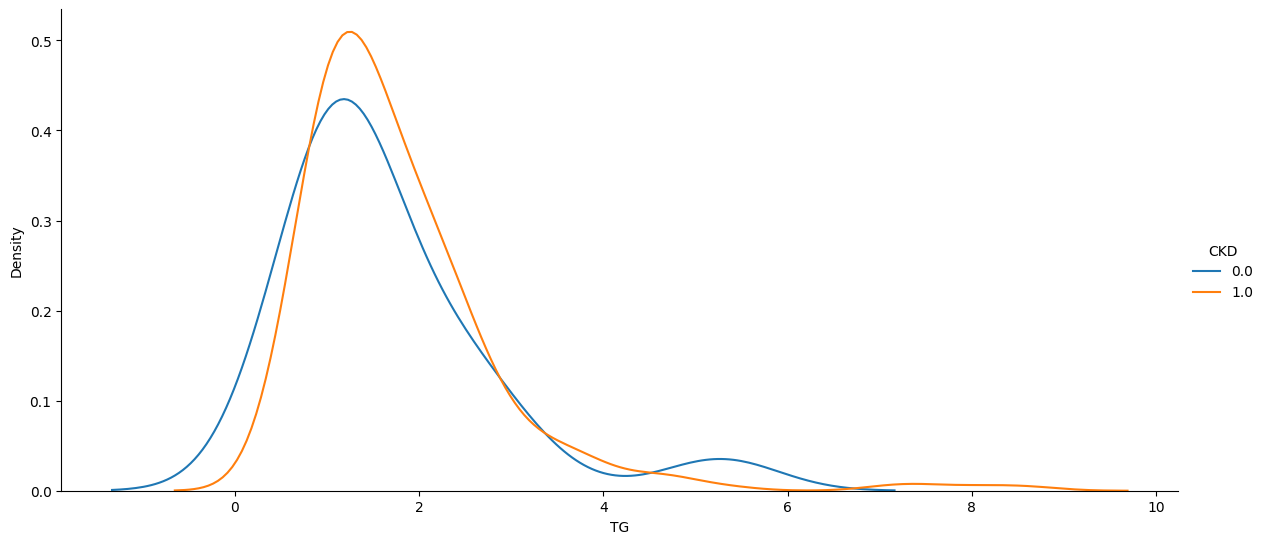

In [255]:
kde('TG')

In [256]:
violin('HDLC')

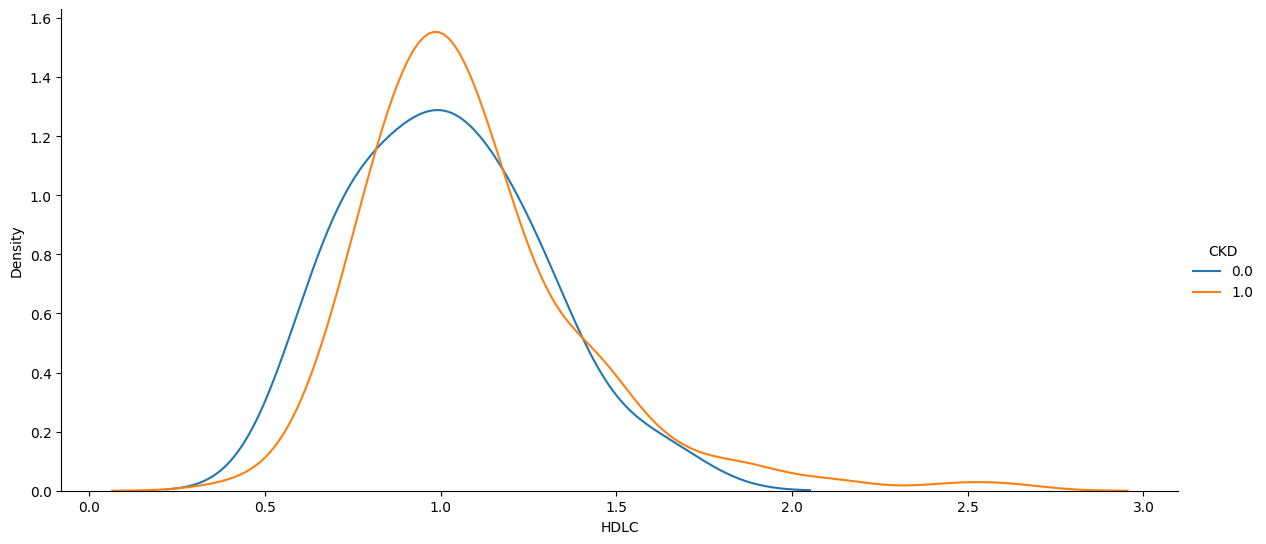

In [257]:
kde('HDLC')

In [258]:
violin('LDLC')

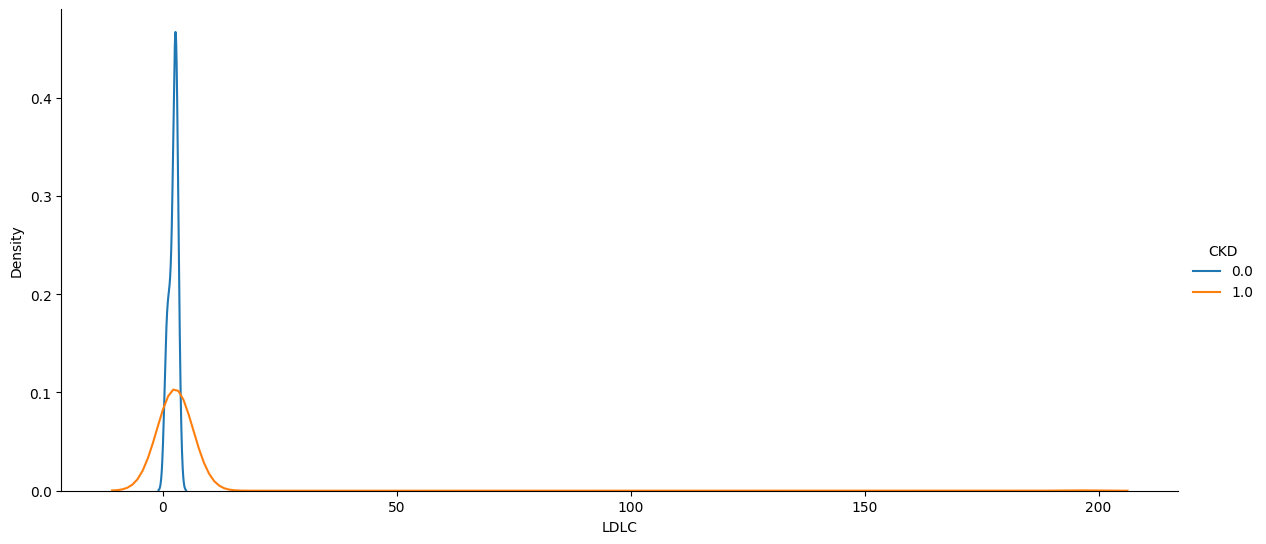

In [259]:
kde('LDLC')

In [260]:
violin('serum_creatinine')

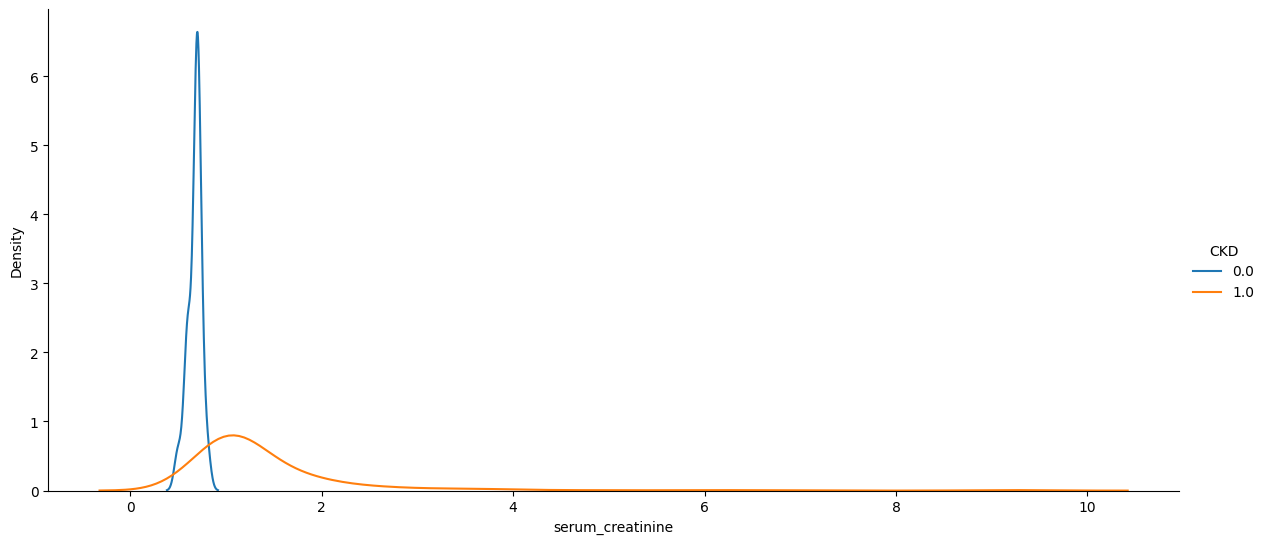

In [261]:
kde('serum_creatinine')

## Data Preparation

In [262]:
# checking for null values

data.isna().sum().sort_values(ascending = False)

CKD                    468
eGFR                   468
serum_creatinine       468
LDLC                     7
HDLC                     7
TG                       5
TC                       5
HbA1c                    3
Diabetesduration         1
FBG                      1
Height                   1
C-peptide                1
BMI                      1
Weight                   0
Insulin                  0
Diabeticretinopathy      0
Lipidloweringdrugs       0
Metformin                0
Drinking                 0
Diabeticnephropathy      0
Smoking                  0
Age                      0
DBP                      0
SBP                      0
Sex                      0
dtype: int64

In [263]:
data.shape

(767, 25)

In [264]:
data = data.dropna()
data.head()

,Sex,Age,Diabetesduration,Diabeticretinopathy,Diabeticnephropathy,Smoking,Drinking,Height,Weight,BMI,SBP,DBP,HbA1c,FBG,TG,C-peptide,TC,HDLC,LDLC,Insulin,Metformin,Lipidloweringdrugs,serum_creatinine,eGFR,CKD
0,Male,57,10.0,1,1,1,0,178.0,60.0,18.937003,101,69,14.1,17.420,1.95,0.98,5.51,1.08,3.71,1,1,1,1.9,30.123762,1.0
1,Male,50,8.0,1,1,1,1,172.0,72.5,24.506490,156,96,10.0,1.024,1.76,0.94,4.40,0.90,2.85,1,0,0,1.1,56.873996,1.0
2,Male,53,8.0,1,0,1,0,168.0,62.0,21.967120,105,71,9.6,8.020,0.84,0.55,4.33,1.04,2.98,1,0,0,1.3,46.588693,1.0
3,Male,52,20.0,1,1,0,0,175.0,66.0,21.551020,104,74,8.1,5.980,1.00,1.36,4.74,1.45,2.90,1,0,0,1.9,30.928035,1.0
4,Female,56,12.0,1,1,0,0,159.0,68.8,27.214113,155,108,10.0,10.770,2.20,3.63,3.37,0.66,1.90,1,0,1,2.7,20.613883,1.0


In [265]:
data.shape

(297, 25)

In [266]:
data.isna().sum().sort_values(ascending = False)

Sex                    0
FBG                    0
eGFR                   0
serum_creatinine       0
Lipidloweringdrugs     0
Metformin              0
Insulin                0
LDLC                   0
HDLC                   0
TC                     0
C-peptide              0
TG                     0
HbA1c                  0
Age                    0
DBP                    0
SBP                    0
BMI                    0
Weight                 0
Height                 0
Drinking               0
Smoking                0
Diabeticnephropathy    0
Diabeticretinopathy    0
Diabetesduration       0
CKD                    0
dtype: int64

In [267]:
data.columns

Index(['Sex', 'Age', 'Diabetesduration', 'Diabeticretinopathy',
       'Diabeticnephropathy', 'Smoking', 'Drinking', 'Height', 'Weight', 'BMI',
       'SBP', 'DBP', 'HbA1c', 'FBG', 'TG', 'C-peptide', 'TC', 'HDLC', 'LDLC',
       'Insulin', 'Metformin', 'Lipidloweringdrugs', 'serum_creatinine',
       'eGFR', 'CKD'],
      dtype='object')

In [268]:
data = data.drop(columns=['Diabeticretinopathy',
       'Diabeticnephropathy', 'Smoking', 'Drinking', 'Height',
       'Weight','Sex','C-peptide', 'TC',
        'Insulin', 'Metformin','Lipidloweringdrugs','eGFR'], axis=1)
data.head()

,Age,Diabetesduration,BMI,SBP,DBP,HbA1c,FBG,TG,HDLC,LDLC,serum_creatinine,CKD
0,57,10.0,18.937003,101,69,14.1,17.420,1.95,1.08,3.71,1.9,1.0
1,50,8.0,24.506490,156,96,10.0,1.024,1.76,0.90,2.85,1.1,1.0
2,53,8.0,21.967120,105,71,9.6,8.020,0.84,1.04,2.98,1.3,1.0
3,52,20.0,21.551020,104,74,8.1,5.980,1.00,1.45,2.90,1.9,1.0
4,56,12.0,27.214113,155,108,10.0,10.770,2.20,0.66,1.90,2.7,1.0


In [269]:
data.shape

(297, 12)

In [270]:
datamod = data.copy()
datamod.head()

,Age,Diabetesduration,BMI,SBP,DBP,HbA1c,FBG,TG,HDLC,LDLC,serum_creatinine,CKD
0,57,10.0,18.937003,101,69,14.1,17.420,1.95,1.08,3.71,1.9,1.0
1,50,8.0,24.506490,156,96,10.0,1.024,1.76,0.90,2.85,1.1,1.0
2,53,8.0,21.967120,105,71,9.6,8.020,0.84,1.04,2.98,1.3,1.0
3,52,20.0,21.551020,104,74,8.1,5.980,1.00,1.45,2.90,1.9,1.0
4,56,12.0,27.214113,155,108,10.0,10.770,2.20,0.66,1.90,2.7,1.0


## Model

In [271]:
ind_col = [col for col in datamod.columns if col != 'CKD']
dep_col = 'CKD'

X = datamod[ind_col] #ดึงคอลัมน์ตัวแปรอิสระที่เลือก (ยกเว้น 'CKD')
y = datamod[dep_col] #ดึงคอลัมน์ตัวแปรตามที่มีชื่อ 'CKD'

In [272]:
#splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [273]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score


In [274]:
num_folds = 5
kf = KFold(n_splits=num_folds)

# Define model names
model_names = ['KNN', 'SVC (Linear)', 'SVC (RBF)', 'Decision Tree', 'Random Forest',  'XGBoost']

# Initialize empty dictionaries to store mean and standard deviation of accuracy
model_mean_accuracy = {}
model_std_accuracy = {}


# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Fold', 'Precision', 'Recall', 'F1-Score', 'Accuracy'])

# Loop through each model and perform K-Fold cross-validation
for model_name, model in zip(model_names, [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    xgb.XGBClassifier()

]):

    # Perform K-Fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Calculate mean and standard deviation of accuracy
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()

    # Store mean and standard deviation of accuracy
    model_mean_accuracy[model_name] = mean_accuracy
    model_std_accuracy[model_name] = std_accuracy

    for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train, y_train), 1):
        # Split data based on current fold
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predict on the test set
        y_pred = model.predict(X_test_fold)

        # Calculate classification report metrics
        report = classification_report(y_test_fold, y_pred, output_dict=True)

        # Extract metrics
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        accuracy = accuracy_score(y_test_fold, y_pred)

        # Create temporary DataFrame for current fold
        fold_df = pd.DataFrame({'Model': [model_name],
                                'Fold': [fold_idx],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1-Score': [f1_score],
                                'Accuracy': [accuracy],
                                'Mean Accuracy': [mean_accuracy],
                                'Std Accuracy': [std_accuracy]})
        # Concatenate temporary DataFrame with results DataFrame
        results_df = pd.concat([results_df, fold_df], ignore_index=True)



# Calculate average scores for each model
average_scores = results_df.groupby('Model').mean().reset_index()

In [275]:
print("Results:")
results_df

Results:


,Model,Fold,Precision,Recall,F1-Score,Accuracy,Mean Accuracy,Std Accuracy
0,KNN,1,0.952948,0.976190,0.964429,0.976190,0.966318,0.011380
1,KNN,2,0.952948,0.976190,0.964429,0.976190,0.966318,0.011380
2,KNN,3,0.951814,0.975610,0.963565,0.975610,0.966318,0.011380
3,KNN,4,0.904819,0.951220,0.927439,0.951220,0.966318,0.011380
4,KNN,5,0.904819,0.951220,0.927439,0.951220,0.966318,0.011380
5,SVC (Linear),1,0.951786,0.928571,0.940035,0.928571,0.947271,0.037834
6,SVC (Linear),2,0.952948,0.976190,0.964429,0.976190,0.947271,0.037834
7,SVC (Linear),3,0.951814,0.975610,0.963565,0.975610,0.947271,0.037834
8,SVC (Linear),4,0.904819,0.951220,0.927439,0.951220,0.947271,0.037834
9,SVC (Linear),5,0.904819,0.951220,0.927439,0.951220,0.947271,0.037834


    - ผลลัพธ์ของโมเดลโดยวัดจากค่าความแม่นยำ (Precision), ค่าการเรียกคืน (Recall), คะแนน F1 (F1-Score), ค่าความถูกต้อง (Accuracy)
    และค่าความถูกต้องเฉลี่ย (Mean Accuracy) บนชุดข้อมูล 5 ชุด (Fold)

In [276]:
print("\nAverage Scores:")
average_scores


Average Scores:


,Model,Fold,Precision,Recall,F1-Score,Accuracy,Mean Accuracy,Std Accuracy
0,Decision Tree,3.0,0.991992,0.990244,0.989918,0.990244,0.990244,0.011949
1,KNN,3.0,0.933469,0.966086,0.949460,0.966086,0.966318,0.011380
2,Random Forest,3.0,0.942880,0.970848,0.956574,0.970848,0.971080,0.009352
3,SVC (Linear),3.0,0.933237,0.956562,0.944582,0.956562,0.947271,0.037834
4,SVC (RBF),3.0,0.933469,0.966086,0.949460,0.966086,0.966318,0.011380
5,XGBoost,3.0,0.966797,0.980604,0.972713,0.980604,0.985482,0.011856


## Model Evaluation

## 1.Decision Tree

In [277]:
# Creating model object
model_dt = DecisionTreeClassifier( )
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [278]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [279]:
print('model_Decision Tree Train Score is : ' , model_dt.score(X_train, y_train))
print('model_Decision Tree Test Score is : ' , model_dt.score(X_test, y_test))
print("The Score is: ",accuracy_score(y_test , pred_dt)*100)

model_Decision Tree Train Score is :  1.0
model_Decision Tree Test Score is :  0.9555555555555556
The Score is:  95.55555555555556


In [280]:
# Assuming cm_dt is your confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_dt = confusion_matrix(y_test, pred_dt)

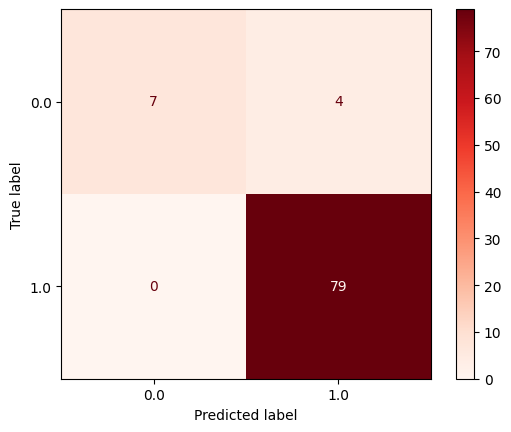

In [281]:
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=model_dt.classes_)
disp_dt.plot(cmap='Reds')
plt.show()

In [282]:
confusion_matrix_dt=confusion_matrix(y_test,pred_dt)
confusion_matrix_dt

array([[ 7,  4],
       [ 0, 79]])

In [283]:
total=sum(sum(confusion_matrix_dt))

sensitivity = confusion_matrix_dt[0,0]/(confusion_matrix_dt[0,0]+confusion_matrix_dt[1,0])
print('Sensitivity (Decision Tree): ', sensitivity )

specificity = confusion_matrix_dt[1,1]/(confusion_matrix_dt[1,1]+confusion_matrix_dt[0,1])
print('Specificity (Decision Tree): ', specificity)

Sensitivity (Decision Tree):  1.0
Specificity (Decision Tree):  0.9518072289156626


In [284]:
total=sum(sum(confusion_matrix_dt))

ppv = confusion_matrix_dt[0,0]/(confusion_matrix_dt[0,0]+confusion_matrix_dt[0,1])
print('Positive Predictive Value (Decision Tree): ', ppv )

npv = confusion_matrix_dt[1,1]/(confusion_matrix_dt[1,0]+confusion_matrix_dt[1,1])
print('Negative Predictive Value (Decision Tree): ', npv)

Positive Predictive Value (Decision Tree):  0.6363636363636364
Negative Predictive Value (Decision Tree):  1.0


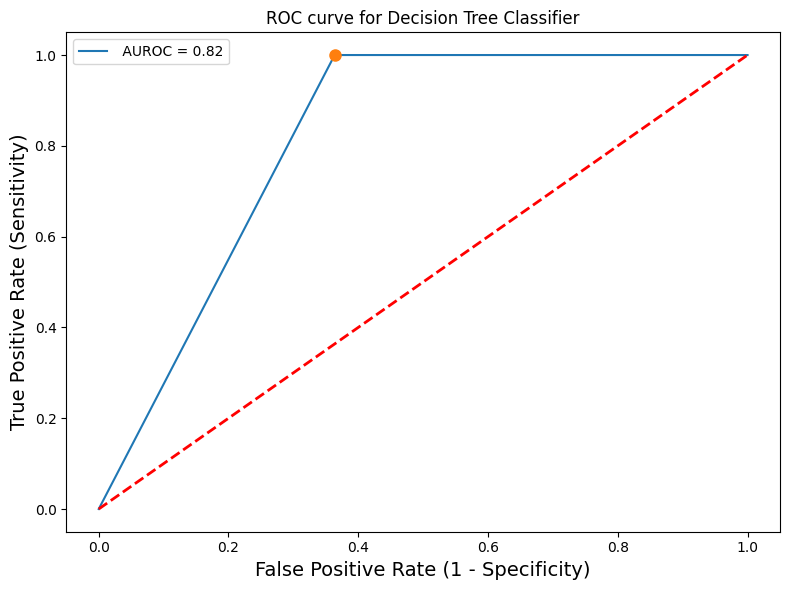

In [285]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_dt)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### 2.KNN

In [286]:
# Creating KNN model object
model_knn = KNeighborsClassifier()

# Training Model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [287]:
# Making Prediction
pred_knn = model_knn.predict(X_test)


In [288]:
print('model_KNN Train Score is : ', model_knn.score(X_train, y_train))
print('model_KNN Test Score is : ', model_knn.score(X_test, y_test))
print("The Score is: ", accuracy_score(y_test, pred_knn)*100)

model_KNN Train Score is :  0.966183574879227
model_KNN Test Score is :  0.8777777777777778
The Score is:  87.77777777777777


In [289]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, pred_knn)
cm_knn

array([[ 0, 11],
       [ 0, 79]])

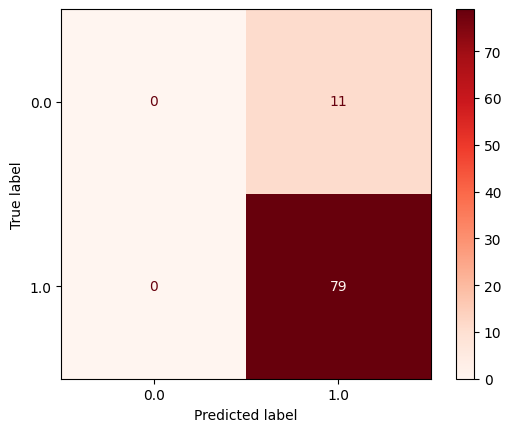

In [290]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_knn.classes_)
disp_knn.plot(cmap='Reds')
plt.show()

In [291]:
total = sum(sum(cm_knn))

sensitivity = cm_knn[0, 0] / (cm_knn[0, 0] + cm_knn[1, 0])
print('Sensitivity (KNN):', sensitivity)

specificity = cm_knn[1, 1] / (cm_knn[1, 1] + cm_knn[0, 1])
print('Specificity (KNN):', specificity)

Sensitivity (KNN): nan
Specificity (KNN): 0.8777777777777778


In [292]:
ppv = cm_knn[0, 0] / (cm_knn[0, 0] + cm_knn[0, 1])
print('Positive Predictive Value (KNN):', ppv)

npv = cm_knn[1, 1] / (cm_knn[1, 0] + cm_knn[1, 1])
print('Negative Predictive Value (KNN):', npv)

Positive Predictive Value (KNN): 0.0
Negative Predictive Value (KNN): 1.0


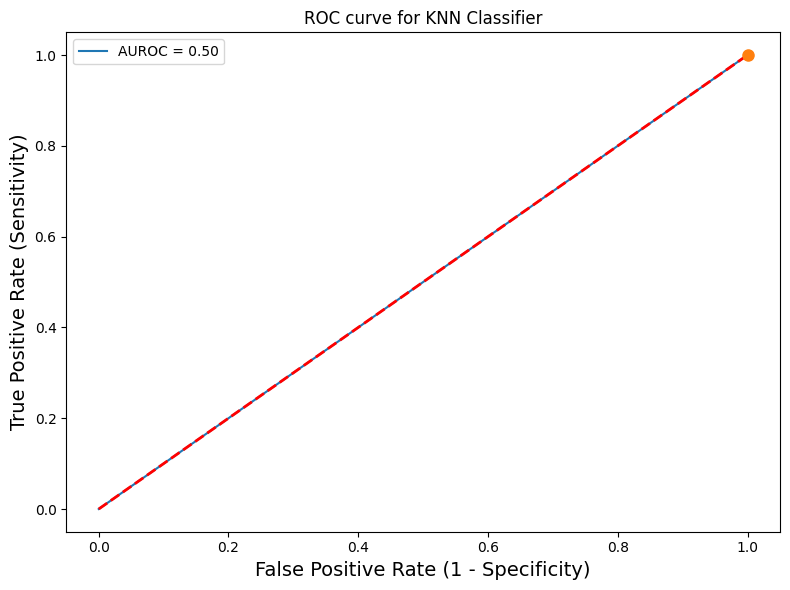

In [293]:
# ROC Curve
fig, (ax2) = plt.subplots(figsize=(8, 6))
fpr, tpr, thresholds_roc = roc_curve(y_test, pred_knn)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, label="AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0, 1], [0, 1], 'r', linestyle="--", lw=2)
ax2.set_xlabel("False Positive Rate", fontsize=14)
ax2.set_ylabel("True Positive Rate", fontsize=14)
ax2.set_title("ROC Curve", fontsize=18)
ax2.legend(loc='best')
plt.title('ROC curve for KNN Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize=8)
plt.tight_layout()

### 3.Random Forest

In [294]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [295]:
# Making Prediction
pred_rf = rf.predict(X_test)

In [296]:
print('model_Random Forest Train Score is : ' , rf.score(X_train, y_train))
print('model_Random Forest Test Score is : ' , rf.score(X_test, y_test))
print("The Score is: ",accuracy_score(y_test , pred_rf)*100)

model_Random Forest Train Score is :  1.0
model_Random Forest Test Score is :  0.8888888888888888
The Score is:  88.88888888888889


In [297]:
 #Confusion Matrix
cm_rf = confusion_matrix(y_test, pred_rf)
cm_rf

array([[ 1, 10],
       [ 0, 79]])

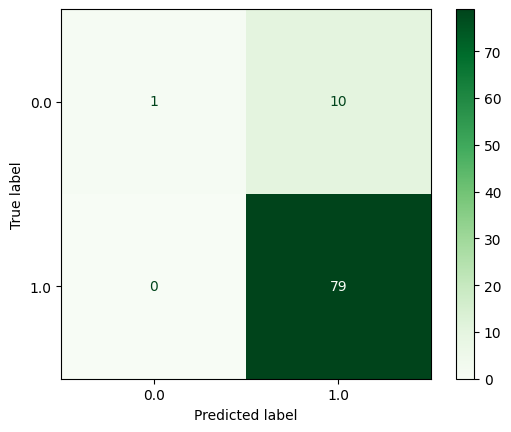

In [298]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=rf.classes_)
disp_rf.plot(cmap='Greens')
plt.show()

In [299]:
total=sum(sum(cm_rf))

sensitivity = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[1,0])
print('Sensitivity (Random Forest): ', sensitivity )

specificity = cm_rf[1,1]/(cm_rf[1,1]+cm_rf[0,1])
print('Specificity (Random Forest): ', specificity)

Sensitivity (Random Forest):  1.0
Specificity (Random Forest):  0.8876404494382022


In [300]:
total = sum(sum(cm_rf))

ppv = cm_rf[0,0] / (cm_rf[0,0] + cm_rf[0,1])
print('Positive Predictive Value (Random Forest): ', ppv )

npv = cm_rf[1,1] / (cm_rf[1,0] + cm_rf[1,1])
print('Negative Predictive Value (Random Forest): ', npv)


Positive Predictive Value (Random Forest):  0.09090909090909091
Negative Predictive Value (Random Forest):  1.0


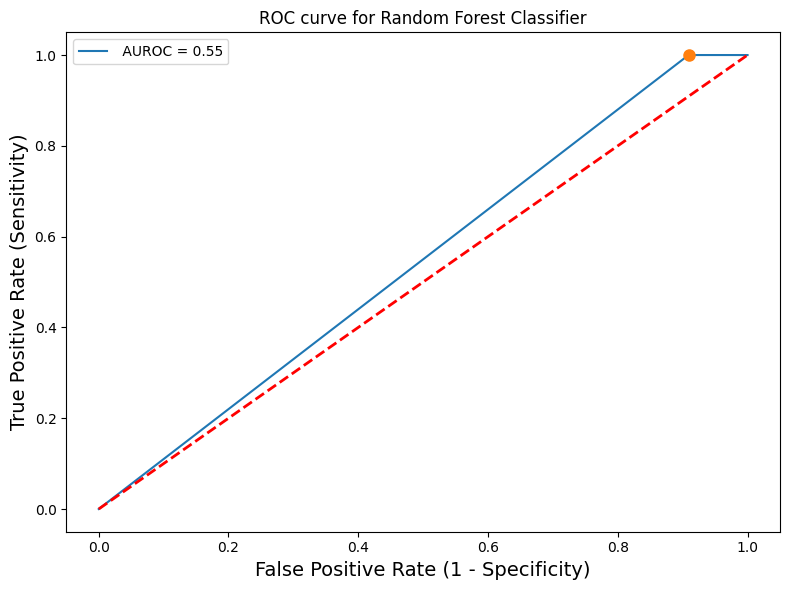

In [301]:
fig, (ax2) = plt.subplots(figsize = (8,6))
#roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_rf)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Random Forest Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### 4.SVC (Linear)

In [302]:
# Creating SVC model object with linear kernel
model_svc_linear = SVC(kernel='linear')

# Training the SVC model
model_svc_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [303]:
# Make predictions on the test dataset
y_pred = model_svc_linear.predict(X_test)

In [304]:
print('model_SVC (Linear) Train Score is : ' , model_svc_linear.score(X_train, y_train))
print('model_SVC (Linear) Test Score is : ' , model_svc_linear.score(X_test, y_test))
print("The Score is: ",accuracy_score(y_test , y_pred)*100)

model_SVC (Linear) Train Score is :  0.9806763285024155
model_SVC (Linear) Test Score is :  0.8444444444444444
The Score is:  84.44444444444444


In [305]:
cm_svc = confusion_matrix(y_test, y_pred)
cm_svc

array([[ 0, 11],
       [ 3, 76]])

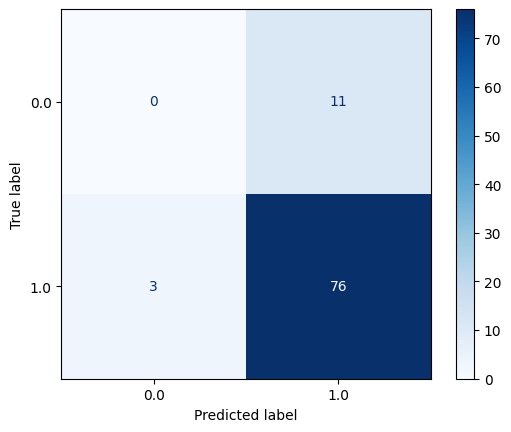

In [306]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=model_svc_linear.classes_)
disp.plot(cmap='Blues')
plt.show()

In [307]:
total = sum(sum(cm_svc))

sensitivity = cm_svc[0, 0] / (cm_svc[0, 0] + cm_svc[1, 0])
print('Sensitivity (SVC (Linear)):', sensitivity)

specificity = cm_svc[1, 1] / (cm_svc[1, 1] + cm_svc[0, 1])
print('Specificity (SVC (Linear)):', specificity)


Sensitivity (SVC (Linear)): 0.0
Specificity (SVC (Linear)): 0.8735632183908046


In [308]:
total = sum(sum(cm_svc))

ppv = cm_svc[0,0] / (cm_svc[0,0] + cm_svc[0,1])
print('Positive Predictive Value (SVC (Linear)): ', ppv )

npv = cm_svc[1,1] / (cm_svc[1,0] + cm_svc[1,1])
print('Negative Predictive Value (SVC (Linear)): ', npv)

Positive Predictive Value (SVC (Linear)):  0.0
Negative Predictive Value (SVC (Linear)):  0.9620253164556962


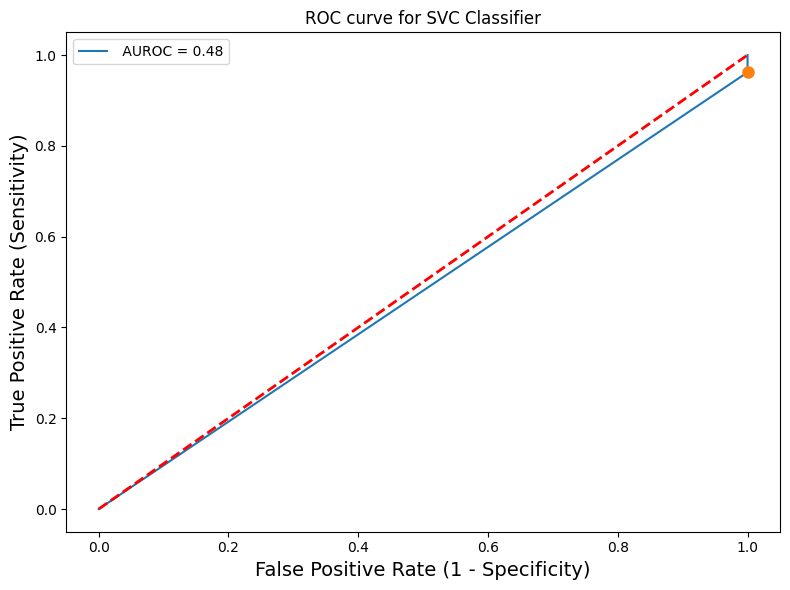

In [309]:
fig, (ax2) = plt.subplots(figsize = (8,6))
#roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for SVC Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
 #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

### 5.SVC (RBF)

In [310]:
# Creating SVC model object with RBF kernel
model_svc = SVC(kernel='rbf')

# Training Model
model_svc.fit(X_train, y_train)

SVC()

In [311]:
# Making Prediction
pred_svc = model_svc.predict(X_test)

In [312]:
print('model_SVC Train Score is : ', model_svc.score(X_train, y_train))
print('model_SVC Test Score is : ', model_svc.score(X_test, y_test))
print("The Score is: ", accuracy_score(y_test, pred_svc)*100)

model_SVC Train Score is :  0.966183574879227
model_SVC Test Score is :  0.8777777777777778
The Score is:  87.77777777777777


In [313]:
# Confusion Matrix
cm_svr = confusion_matrix(y_test, pred_svc)
cm_svr

array([[ 0, 11],
       [ 0, 79]])

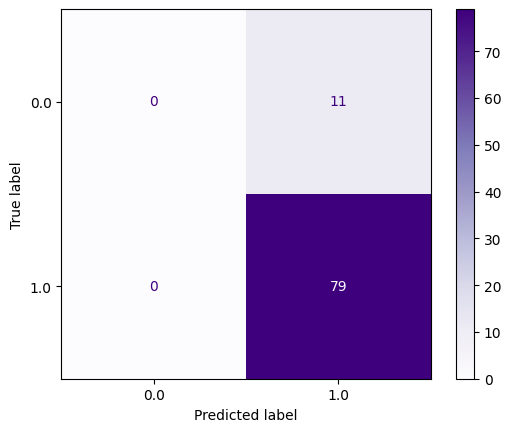

In [314]:
# Confusion Matrix Visualization (assuming you fixed the import error)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svr, display_labels=model_svc.classes_)
disp_svc.plot(cmap='Purples')
plt.show()

In [315]:
# Evaluation Metrics
total = sum(sum(cm_svr))

sensitivity = cm_svr[0, 0] / (cm_svr[0, 0] + cm_svr[1, 0])
print('Sensitivity (SVC (RBF)):', sensitivity)

specificity = cm_svr[1, 1] / (cm_svr[1, 1] + cm_svr[0, 1])
print('Specificity (SVC (RBF)):', specificity)

Sensitivity (SVC (RBF)): nan
Specificity (SVC (RBF)): 0.8777777777777778


In [316]:
ppv = cm_svr[0, 0] / (cm_svr[0, 0] + cm_svr[0, 1])
print('Positive Predictive Value ((SVC (RBF)):', ppv)

npv = cm_svr[1, 1] / (cm_svr[1, 0] + cm_svr[1, 1])
print('Negative Predictive Value ((SVC (RBF)):', npv)


Positive Predictive Value ((SVC (RBF)): 0.0
Negative Predictive Value ((SVC (RBF)): 1.0


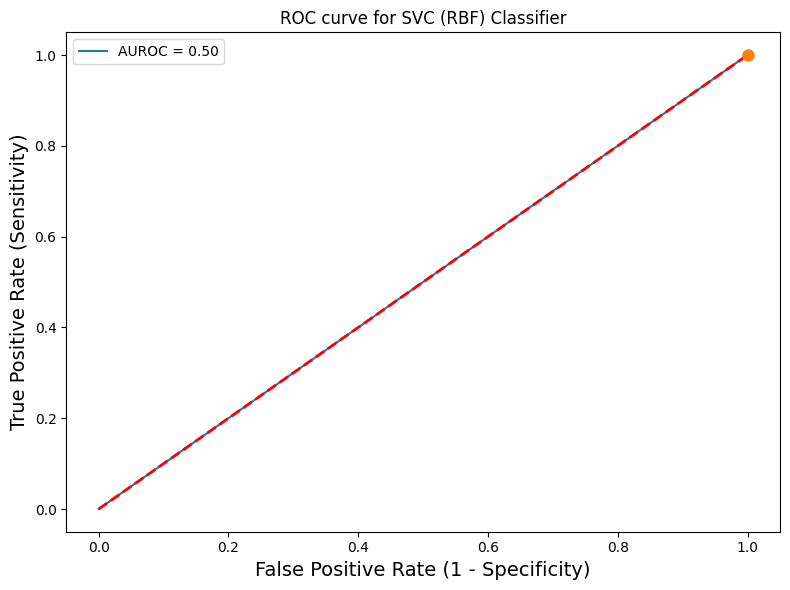

In [317]:
# ROC Curve
fig, (ax2) = plt.subplots(figsize=(8, 6))
fpr, tpr, thresholds_roc = roc_curve(y_test, pred_svc)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, label="AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0, 1], [0, 1], 'r', linestyle="--", lw=2)
ax2.set_xlabel("False Positive Rate", fontsize=14)
ax2.set_ylabel("True Positive Rate", fontsize=14)
ax2.set_title("ROC Curve", fontsize=18)
ax2.legend(loc='best')
plt.title('ROC curve for SVC (RBF) Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

# Find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize=8)
plt.tight_layout()

### 6.Xgboost

In [318]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [319]:
pred_xgb= model_xgb.predict(X_test)

In [320]:
print('model_XGB Train Score is : ' , model_xgb.score(X_train, y_train))
print('model_XGB Test Score is : ' , model_xgb.score(X_test, y_test))
print("The Score is: ",accuracy_score(y_test , pred_xgb)*100)

model_XGB Train Score is :  1.0
model_XGB Test Score is :  0.9111111111111111
The Score is:  91.11111111111111


In [321]:
 #Confusion Matrix
cm_xgb = confusion_matrix(y_test, pred_xgb)
cm_xgb

array([[ 3,  8],
       [ 0, 79]])

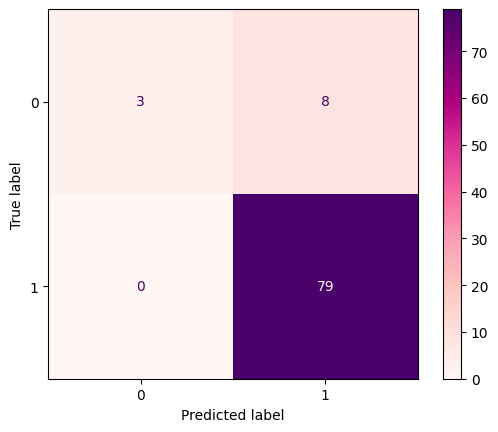

In [322]:
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=model_xgb.classes_)
disp_xgb.plot(cmap='RdPu')
plt.show()

In [323]:
total=sum(sum(cm_xgb))

sensitivity = cm_xgb[0,0]/(cm_xgb[0,0]+cm_xgb[1,0])
print('Sensitivity (Xgboost): ', sensitivity )

specificity = cm_xgb[1,1]/(cm_xgb[1,1]+cm_xgb[0,1])
print('Specificity (Xgboost): ', specificity)

Sensitivity (Xgboost):  1.0
Specificity (Xgboost):  0.9080459770114943


In [324]:
ppv = cm_xgb[0,0]/(cm_xgb[0,0]+cm_xgb[0,1])
print('Positive Predictive Value (Xgboost): ', ppv )

npv = cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1])
print('Negative Predictive Value (Xgboost): ', npv)

Positive Predictive Value (Xgboost):  0.2727272727272727
Negative Predictive Value (Xgboost):  1.0


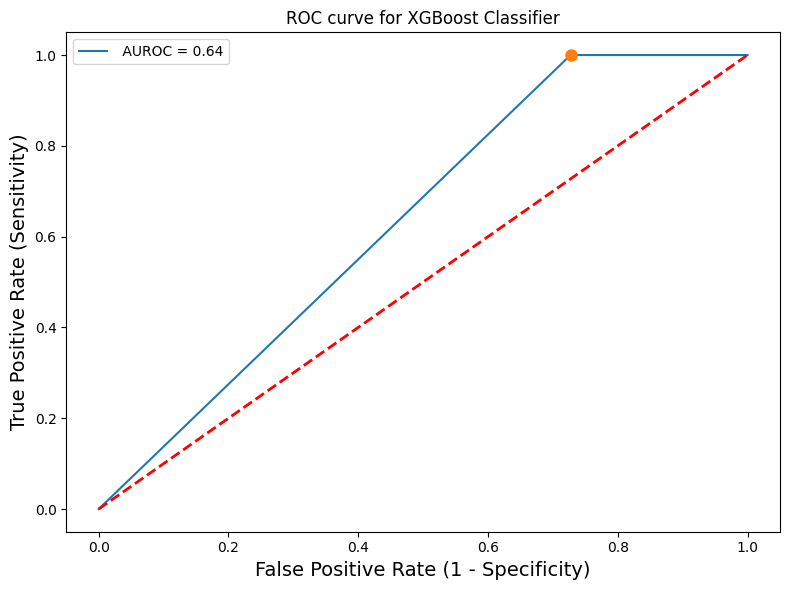

In [325]:
fig, (ax2) = plt.subplots(figsize = (8,6))
#roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_xgb)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XGBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [326]:
import sklearn
print(sklearn.__version__)


1.2.2


In [327]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


## Save Model

In [328]:
import pickle
import joblib 

In [329]:
models = {
    'model1': model_dt,
    'model2': model_knn,
    'model3': rf,
    'model4': model_svc_linear,
    'model5': model_svc,
    'model6': model_xgb
}

In [330]:
selected = 'model1'

In [331]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [332]:
directory_path = '/content/gdrive/My Drive/Colab Notebooks/'

In [333]:
with open(directory_path + 'selected.pkl', 'wb') as file:
    pickle.dump(models[selected], file)

In [334]:
from joblib import dump

# Assuming 'models' is a dictionary of trained models and 'selected' is the key for the model you want to save
# 'directory_path' should end with a slash if it's not empty, e.g., '/path/to/directory/'

# Save the model using joblib with a .joblib extension
dump(models[selected], directory_path + 'selected.joblib')


['/content/gdrive/My Drive/Colab Notebooks/selected.joblib']

In [335]:
import joblib

In [336]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [337]:
# save model by joblib
joblib.dump(model, '/content/gdrive/My Drive/Colab Notebooks/selected.joblib')

['/content/gdrive/My Drive/Colab Notebooks/selected.joblib']

In [ ]:
import os

# ตรวจสอบไดเร็กทอรีปัจจุบัน
print(os.getcwd())

# ตรวจสอบเนื้อหาของไดเร็กทอรี
os.listdir()


/content


['.config',
 'Diabetic_Nephropathy_withegfrclass (3).csv',
 'Diabetic_Nephropathy_withegfrclass (2).csv',
 'Diabetic_Nephropathy_withegfrclass (4).csv',
 'Diabetic_Nephropathy_withegfrclass (1).csv',
 'gdrive',
 'Diabetic_Nephropathy_withegfrclass.csv',
 'Diabetic_Nephropathy_v1.csv',
 'sample_data']

## Egfr classification

In [ ]:
from joblib import load

model = load("/content/gdrive/My Drive/Colab Notebooks/model_dt.joblib")


In [ ]:
cl = data.copy()
cl.head()

,Age (year),Diabetes duration (year),BMI (kg/m2),SBP (mmHg),DBP (mmHg),HbA1c (%),FBG (mmol/L),TG (mmoll),HDLC (mmoll),LDLC (mmoll),serum_creatinine,eGFR,CKD,eGFR_Class,Label Encoding
0,57,10.0,18.937003,101,69,14.1,17.420,1.95,1.08,3.71,1.9,30.123762,1.0,G3b,3
1,50,8.0,24.506490,156,96,10.0,1.024,1.76,0.90,2.85,1.1,56.873996,1.0,G3a,2
2,53,8.0,21.967120,105,71,9.6,8.020,0.84,1.04,2.98,1.3,46.588693,1.0,G3a,2
3,52,20.0,21.551020,104,74,8.1,5.980,1.00,1.45,2.90,1.9,30.928035,1.0,G3b,3
4,56,12.0,27.214113,155,108,10.0,10.770,2.20,0.66,1.90,2.7,20.613883,1.0,G4,4


In [ ]:
cl.nunique()

Age (year)                   51
Diabetes duration (year)     26
BMI (kg/m2)                 245
SBP (mmHg)                   83
DBP (mmHg)                   57
HbA1c (%)                    76
FBG (mmol/L)                257
TG (mmoll)                  172
HDLC (mmoll)                107
LDLC (mmoll)                198
serum_creatinine             40
eGFR                        223
CKD                           2
eGFR_Class                    6
Label Encoding                6
dtype: int64

In [ ]:
try:
    # โค้ดเริ่มต้นสำหรับการโหลดข้อมูล eGFR
    X = data[["eGFR"]]  # Features (consider feature engineering if needed)
    y = data["Label Encoding"]  # Labels (assuming preprocessed)
except Exception as e:
    print(f"Error loading eGFR data: {e}")
    A = None
    B = None

# เช็คให้แน่ใจว่าข้อมูลถูกโหลดสำเร็จ และสร้างชุดข้อมูล A_train, A_test, b_train, b_test
if A is not None and B is not None:
    # ในส่วนนี้คุณสามารถทำการแบ่งชุดข้อมูล (data splitting) ได้โดยใช้ train_test_split
    # โดยปรับค่า test_size ตามที่คุณต้องการ
    from sklearn.model_selection import train_test_split
    A_train, A_test, b_train, b_test = train_test_split(A, B, test_size=0.3)

    # หากต้องการใช้ pre-trained model หรือ fine-tuning
    if model is not None:
        try:
            # Fine-tuning โมเดล
            model.fit(A_train, b_train)
            print("Successfully fine-tuned pre-trained model.")
        except Exception as e:
            print(f"Error fine-tuning pre-trained model: {e}")

    # หากไม่สามารถใช้ pre-trained model ได้หรือไม่มี pre-trained model
    if (model is None) or (not model):
        # Train a new Decision Tree model from scratch
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
        model.fit(A_train, b_train)
        print("Trained a new Decision Tree model.")

    # Make predictions on test set
    b_pred = model.predict(A_test)

    # Convert predictions to eGFR class labels (modify if needed)
    b_pred_labels = b_pred  # สมมติว่าใช้ค่าตัวเลขเลย

    # Evaluate model performance
    from sklearn.metrics import accuracy_score, classification_report

    accuracy = accuracy_score(b_test, b_pred)
    print('Accuracy:', accuracy)
    print('\nClassification Report:\n', classification_report(b_test, b_pred_labels))

else:
    print("Error: Data loading failed. Please check your data path and format.")


Error fine-tuning pre-trained model: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:eGFR_Class: object


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:eGFR_Class: object